## Preparação

### Importação das bibliotecas

In [1]:
import pandas as pd #Lidar com dataframes
import numpy as np #Lidar com numeros e arrays
import matplotlib.pyplot as plt # Lidar com gráficos
from scipy.stats import gamma, norm, probplot, pearsonr, power_divergence
import math

In [2]:
np.seterr(divide='ignore')
pd.set_option('mode.chained_assignment', None)

### Tratamento dos dados

In [3]:
chromecast = pd.read_csv("dataset_chromecast.csv")
smarttv = pd.read_csv("dataset_smart-tv.csv")

#Convertendo as colunas em logaritmos na base 10
chromecast['bytes_up_log'] = np.log10(chromecast['bytes_up'])
chromecast['bytes_down_log'] = np.log10(chromecast['bytes_down'])
smarttv['bytes_up_log'] = np.log10(smarttv['bytes_up'])
smarttv['bytes_down_log'] = np.log10(smarttv['bytes_down'])

#Transformando os valores de log com -inf (motivados por divisões por zero) em zero
chromecast.bytes_up_log.loc[np.isneginf(chromecast.bytes_up_log)]=0
chromecast.bytes_down_log.loc[np.isneginf(chromecast.bytes_down_log)]=0
smarttv.bytes_up_log.loc[np.isneginf(smarttv.bytes_up_log)]=0
smarttv.bytes_down_log.loc[np.isneginf(smarttv.bytes_down_log)]=0

#Criando coluna com as horas
chromecast["hora"] = chromecast["date_hour"].apply(lambda x: int(x.split(" ")[1].split(":")[0]))
smarttv["hora"] = smarttv["date_hour"].apply(lambda x: int(x.split(" ")[1].split(":")[0]))

In [4]:
chromecast.head(2)

,device_id,date_hour,bytes_up,bytes_down,bytes_up_log,bytes_down_log,hora
0,66161985,2021-09-06 00:01:00,2987.016393,49185.704918,3.475238,4.691839,0
1,66161985,2021-09-06 00:02:00,685.935484,328.258065,2.836283,2.516215,0


In [5]:
smarttv.head(2)

,device_id,date_hour,bytes_up,bytes_down,bytes_up_log,bytes_down_log,hora
0,77209603,2021-11-22 15:23:00,132932.983607,2.818140e+06,5.123633,6.449962,15
1,77209603,2021-11-22 15:24:00,115770.491803,2.264410e+06,5.063598,6.354955,15


## Estatísticas Gerais

### Histograma

Para o cálculo do histograma, será utilizado a regra de Sturges.

Número de classes = 1 + 3,3322 log(N) | N é o número de dados

Amplitude = (Maior valor - Menor Valor) / Número de classes

In [6]:
def sturges(dataframe, coluna):
    n = len(dataframe.index)
    k = 1+3.3322*np.log10(n) #Numero de classes 
    return round(k)

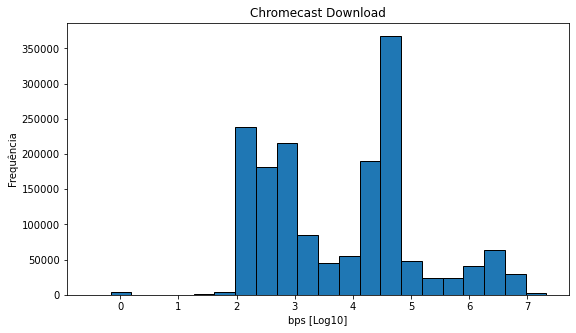

In [7]:
plt.figure(figsize=(9,5))
plt.hist(chromecast.bytes_down_log, bins = sturges(chromecast,'bytes_down_log'), edgecolor="black")
plt.title("Chromecast Download")
plt.xlabel("bps [Log10]")
plt.ylabel("Frequência")
plt.show()

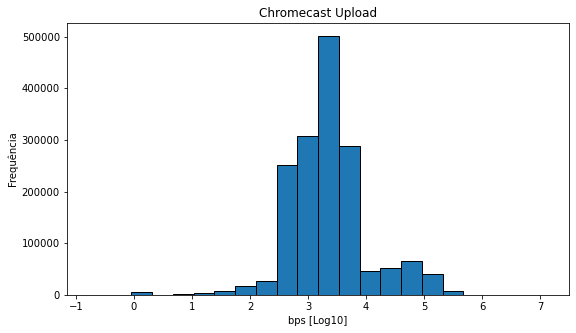

In [8]:
plt.figure(figsize=(9,5))
plt.hist(chromecast.bytes_up_log, bins = sturges(chromecast,'bytes_up_log'), edgecolor="black")
plt.title("Chromecast Upload")
plt.xlabel("bps [Log10]")
plt.ylabel("Frequência")
plt.show()

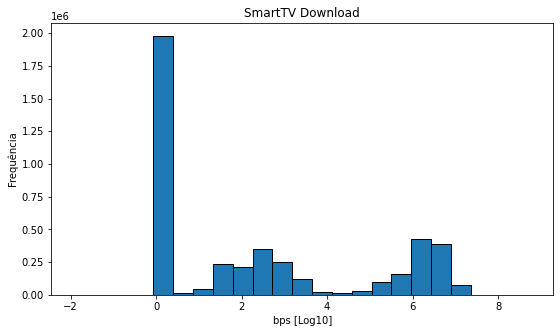

In [9]:
plt.figure(figsize=(9,5))
plt.hist(smarttv.bytes_down_log, bins = sturges(smarttv,'bytes_down_log'), edgecolor="black")
plt.title("SmartTV Download")
plt.xlabel("bps [Log10]")
plt.ylabel("Frequência")
plt.show()

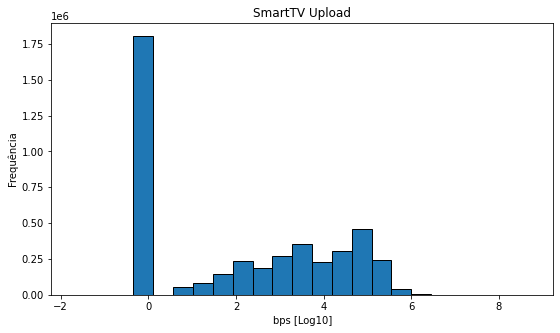

In [10]:
plt.figure(figsize=(9,5))
plt.hist(smarttv.bytes_up_log, bins = sturges(smarttv,'bytes_up_log'), edgecolor="black")
plt.title("SmartTV Upload")
plt.xlabel("bps [Log10]")
plt.ylabel("Frequência")
plt.show()

### Função Distribuição Empírica

Como a função de distribuição empírica é dada por f(x) = observaçõoes menores que x / total de observações, podemos utilizar a função linspace do numpy, em conjunto com um array ordenado de valores.

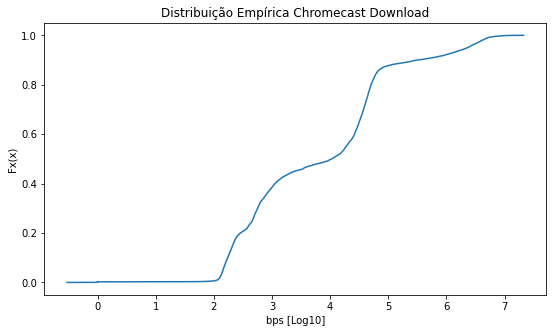

In [11]:
plt.figure(figsize=(9,5))
plt.plot(
    chromecast["bytes_down_log"].sort_values(),
    np.linspace(0, 1, len(chromecast['bytes_down_log']))
)
plt.xlabel("bps [Log10]")
plt.ylabel("Fx(x)")
plt.title("Distribuição Empírica Chromecast Download")
plt.show()

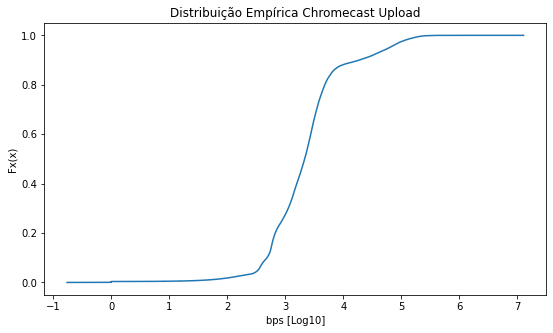

In [12]:
plt.figure(figsize=(9,5))
plt.plot(
    chromecast["bytes_up_log"].sort_values(),
    np.linspace(0, 1, len(chromecast['bytes_up_log']))
)
plt.xlabel("bps [Log10]")
plt.ylabel("Fx(x)")
plt.title("Distribuição Empírica Chromecast Upload")
plt.show()

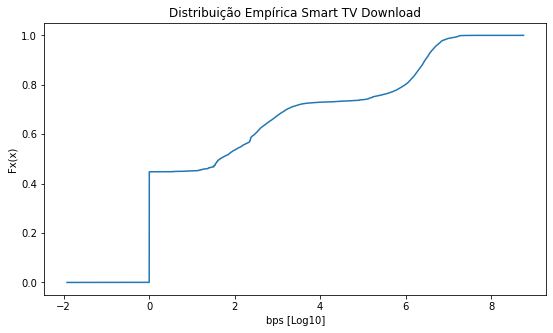

In [13]:
plt.figure(figsize=(9,5))
plt.plot(
    smarttv["bytes_down_log"].sort_values(),
    np.linspace(0, 1, len(smarttv['bytes_down_log']))
)
plt.xlabel("bps [Log10]")
plt.ylabel("Fx(x)")
plt.title("Distribuição Empírica Smart TV Download")
plt.show()

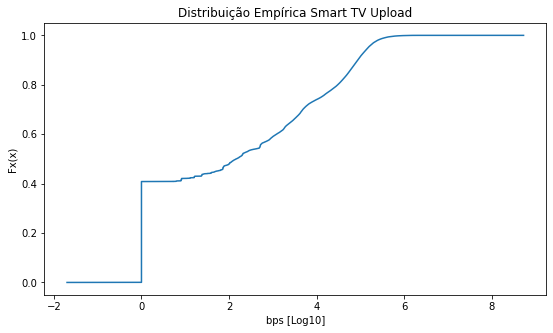

In [14]:
plt.figure(figsize=(9,5))
plt.plot(
    smarttv["bytes_up_log"].sort_values(),
    np.linspace(0, 1, len(smarttv['bytes_up_log']))
)
plt.xlabel("bps [Log10]")
plt.ylabel("Fx(x)")
plt.title("Distribuição Empírica Smart TV Upload")
plt.show()

### Boxplot

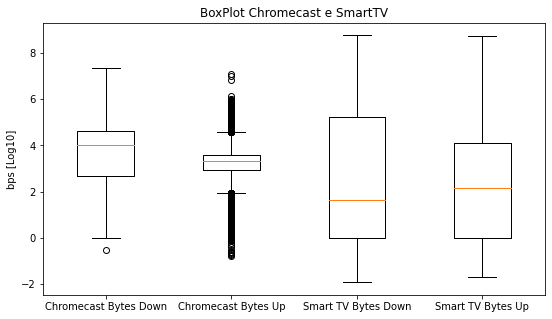

In [15]:
plt.figure(figsize=(9,5))
plt.boxplot(
    [chromecast["bytes_down_log"], chromecast["bytes_up_log"], smarttv["bytes_down_log"], smarttv["bytes_up_log"]],
    labels=["Chromecast Bytes Down", "Chromecast Bytes Up", "Smart TV Bytes Down", "Smart TV Bytes Up"],
)
plt.ylabel("bps [Log10]")
plt.title("BoxPlot Chromecast e SmartTV")
plt.show()

### Média, Variância e Desvio Padrão

In [16]:
print('Estátisicas Chromecast')
print('Download')
print('Média',chromecast['bytes_down_log'].mean(),'Desvio Padrão',chromecast['bytes_down_log'].std(),'Variância',chromecast['bytes_down_log'].var())
print('Upload')
print('Média',chromecast['bytes_up_log'].mean(),'Desvio Padrão',chromecast['bytes_up_log'].std(),'Variância',chromecast['bytes_up_log'].var())

Estátisicas Chromecast
Download
Média 3.7993354880842083 Desvio Padrão 1.290728404554229 Variância 1.665979814323106
Upload
Média 3.34967172511555 Desvio Padrão 0.6794116343782344 Variância 0.46160016892850364


In [17]:
print('Estátisicas Smart TV')
print('Download')
print('Média',smarttv['bytes_down_log'].mean(),'Desvio Padrão',smarttv['bytes_down_log'].std(),'Variância',smarttv['bytes_down_log'].var())
print('Upload')
print('Média',smarttv['bytes_up_log'].mean(),'Desvio Padrão',smarttv['bytes_up_log'].std(),'Variância',smarttv['bytes_up_log'].var())

Estátisicas Smart TV
Download
Média 2.3501726398968774 Desvio Padrão 2.5930524027584805 Variância 6.723920763451529
Upload
Média 2.1565902037573172 Desvio Padrão 2.028073655549233 Variância 4.11308275233283


## Estatísticas por Horário

### Boxplot

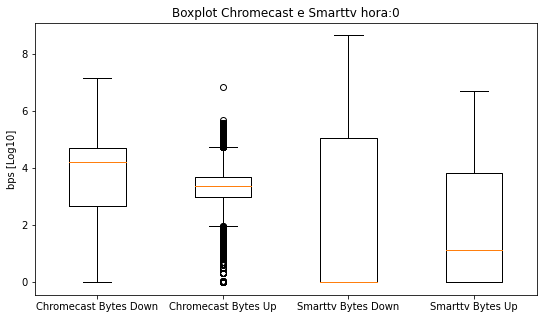

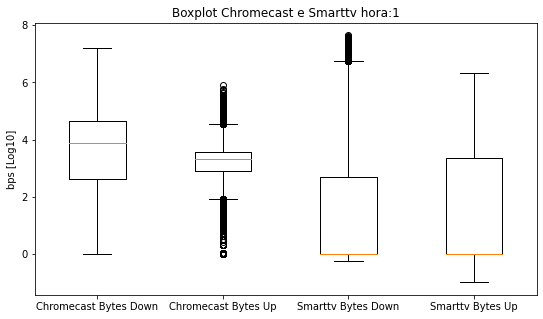

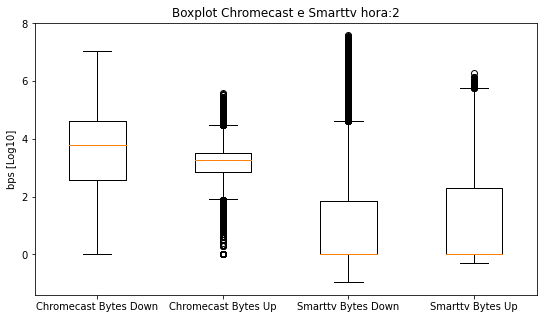

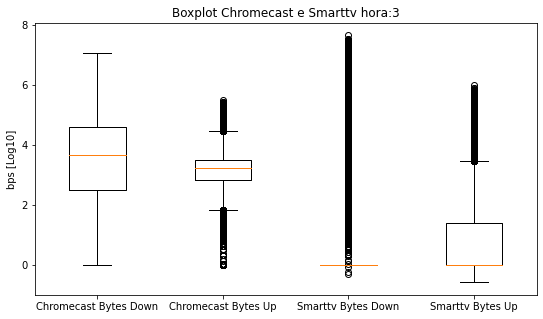

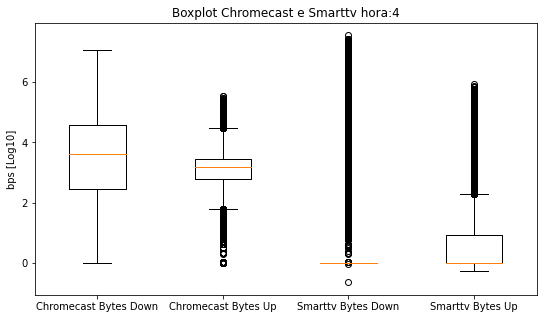

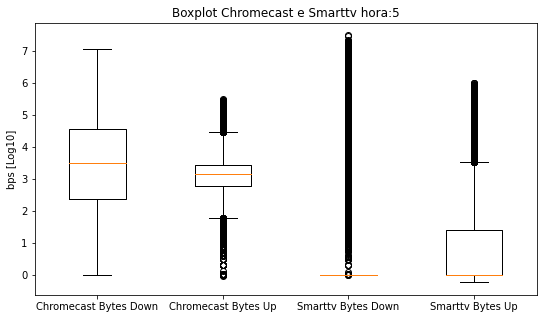

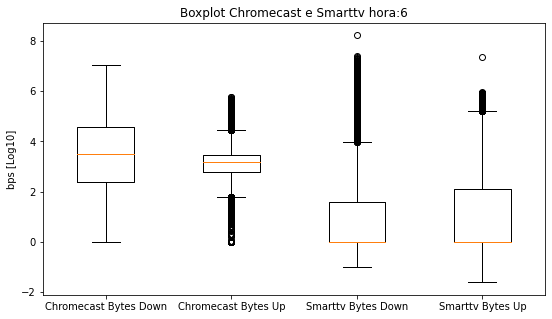

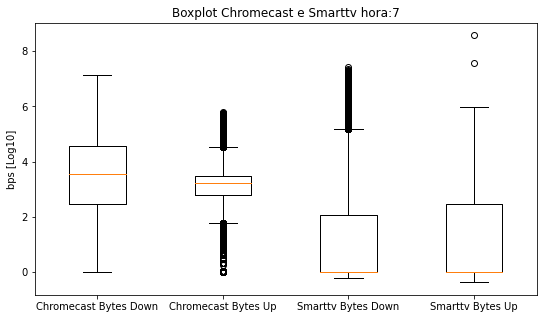

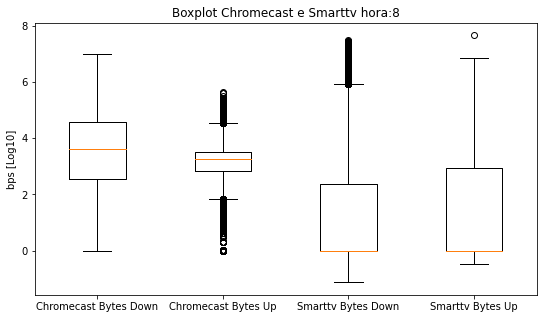

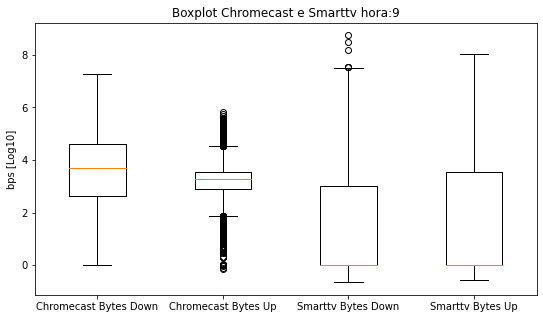

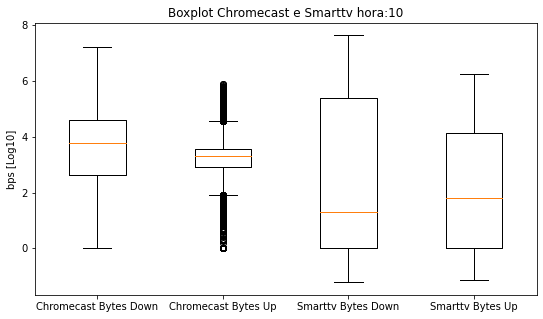

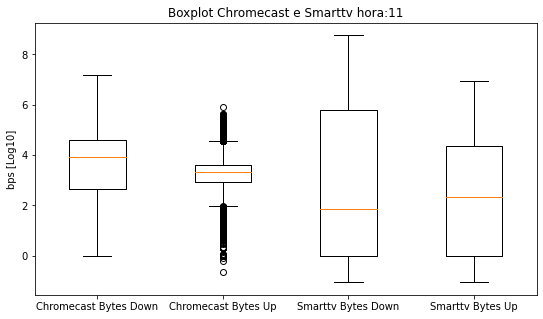

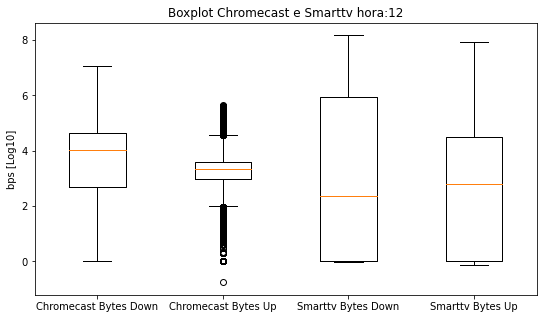

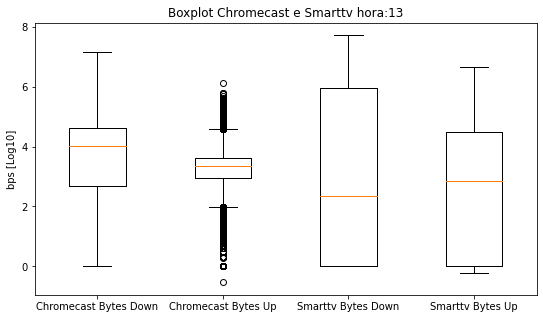

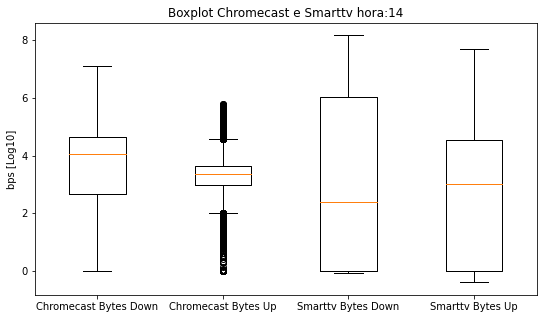

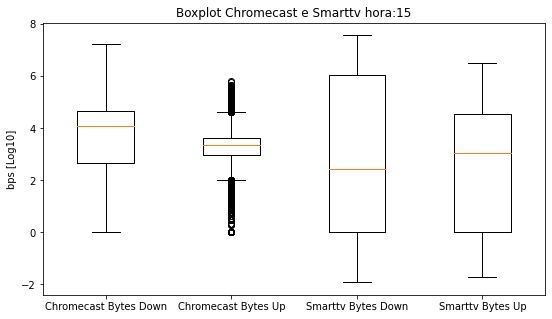

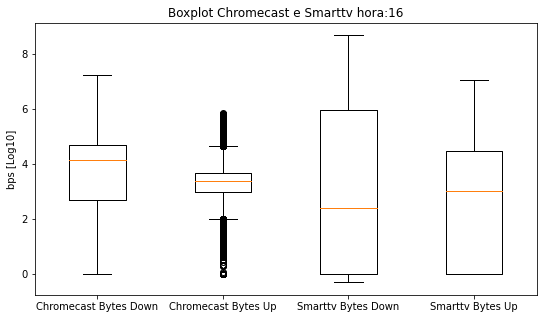

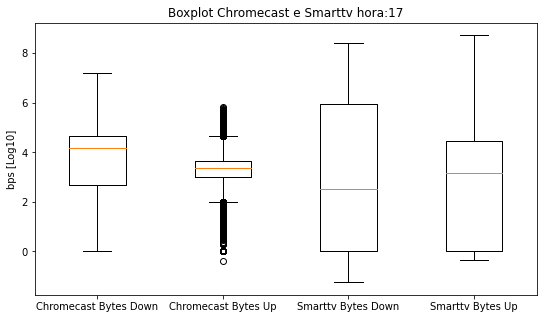

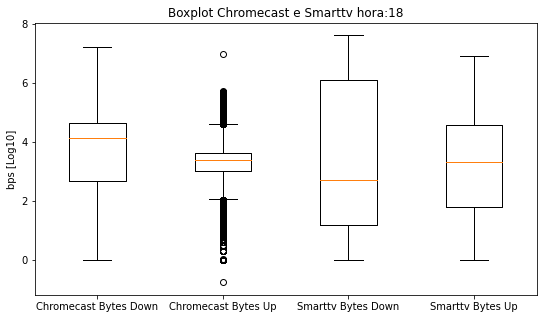

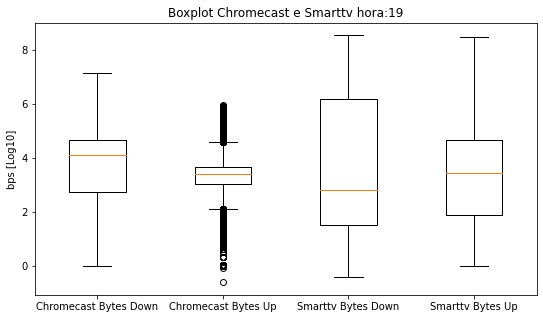

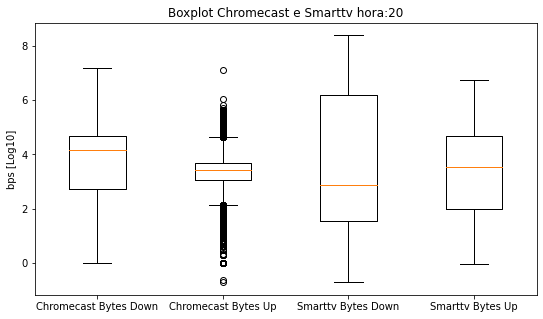

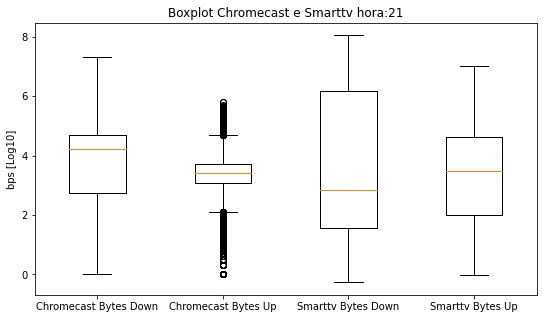

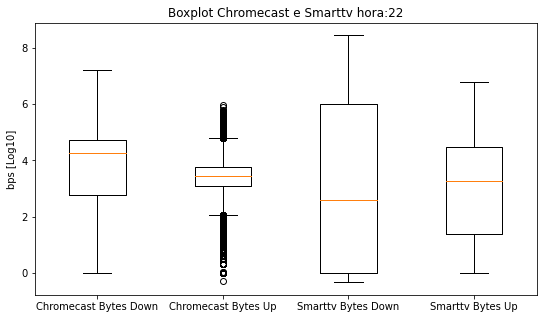

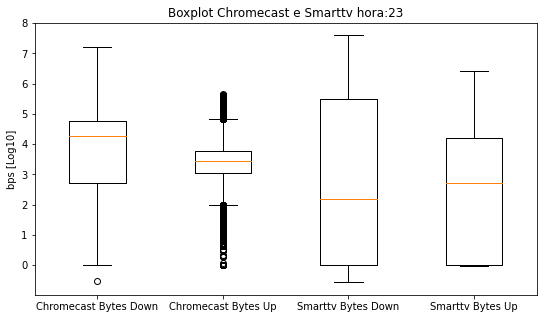

In [18]:
for hora in range(0, 24):
    plt.figure(figsize=(9,5))
    plt.boxplot(
        [chromecast[chromecast["hora"] == hora]["bytes_down_log"],chromecast[chromecast["hora"] == hora]["bytes_up_log"],
        smarttv[smarttv["hora"] == hora]["bytes_down_log"],smarttv[smarttv["hora"] == hora]["bytes_up_log"]],
        labels=["Chromecast Bytes Down", "Chromecast Bytes Up","Smarttv Bytes Down", "Smarttv Bytes Up"]
    )
    plt.ylabel("bps [Log10]")
    plt.title(f"Boxplot Chromecast e Smarttv hora:{hora}")
    plt.show()

### Média, Variância e Desvio Padrão

Text(0.5, 1.0, 'bps Download Chromecast: Média, Variância e Desvio Padrão por Hora')

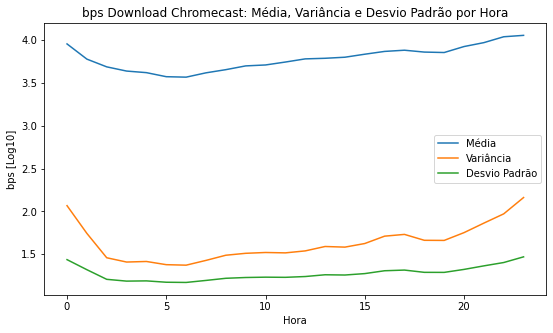

In [19]:
plt.figure(figsize=(9,5))
plt.plot(chromecast.groupby("hora")["bytes_down_log"].mean())
plt.plot(chromecast.groupby("hora")["bytes_down_log"].var())
plt.plot(chromecast.groupby("hora")["bytes_down_log"].std())
plt.xlabel("Hora")
plt.ylabel("bps [Log10]")
plt.legend(["Média", "Variância", "Desvio Padrão"])
plt.title('bps Download Chromecast: Média, Variância e Desvio Padrão por Hora')

Text(0.5, 1.0, 'bps Upload Chromecast: Média, Variância e Desvio Padrão por Hora')

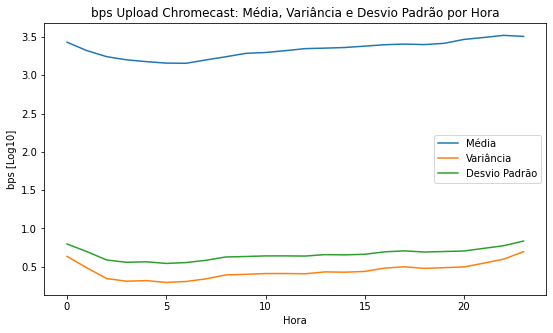

In [20]:
plt.figure(figsize=(9,5))
plt.plot(chromecast.groupby("hora")["bytes_up_log"].mean())
plt.plot(chromecast.groupby("hora")["bytes_up_log"].var())
plt.plot(chromecast.groupby("hora")["bytes_up_log"].std())
plt.xlabel("Hora")
plt.ylabel("bps [Log10]")
plt.legend(["Média", "Variância", "Desvio Padrão"])
plt.title('bps Upload Chromecast: Média, Variância e Desvio Padrão por Hora')

Text(0.5, 1.0, 'bps Download Smart TV: Média, Variância e Desvio Padrão por Hora')

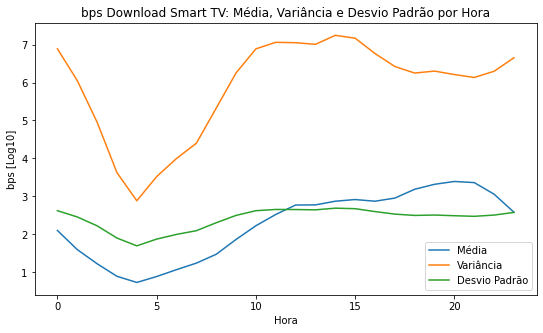

In [21]:
plt.figure(figsize=(9,5))
plt.plot(smarttv.groupby("hora")["bytes_down_log"].mean())
plt.plot(smarttv.groupby("hora")["bytes_down_log"].var())
plt.plot(smarttv.groupby("hora")["bytes_down_log"].std())
plt.xlabel("Hora")
plt.ylabel("bps [Log10]")
plt.legend(["Média", "Variância", "Desvio Padrão"])
plt.title('bps Download Smart TV: Média, Variância e Desvio Padrão por Hora')

Text(0.5, 1.0, 'bps Upload Smart TV: Média, Variância e Desvio Padrão por Hora')

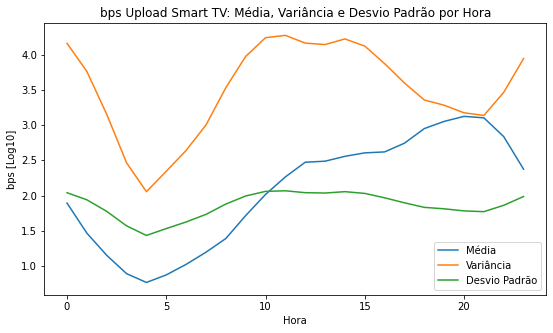

In [22]:
plt.figure(figsize=(9,5))
plt.plot(smarttv.groupby("hora")["bytes_up_log"].mean())
plt.plot(smarttv.groupby("hora")["bytes_up_log"].var())
plt.plot(smarttv.groupby("hora")["bytes_up_log"].std())
plt.xlabel("Hora")
plt.ylabel("bps [Log10]")
plt.legend(["Média", "Variância", "Desvio Padrão"])
plt.title('bps Upload Smart TV: Média, Variância e Desvio Padrão por Hora')

## Caracterizando os horários com maior valor de tráfego

### Criação dos datasets

In [23]:
dataset1_hora = smarttv.groupby("hora")["bytes_up_log"].median().idxmax()
dataset2_hora = smarttv.groupby("hora")["bytes_up_log"].mean().idxmax()
dataset3_hora = smarttv.groupby("hora")["bytes_down_log"].median().idxmax()
dataset4_hora = smarttv.groupby("hora")["bytes_down_log"].mean().idxmax()

dataset5_hora = chromecast.groupby("hora")["bytes_up_log"].median().idxmax()
dataset6_hora = chromecast.groupby("hora")["bytes_up_log"].mean().idxmax()
dataset7_hora = chromecast.groupby("hora")["bytes_down_log"].median().idxmax()
dataset8_hora = chromecast.groupby("hora")["bytes_down_log"].mean().idxmax()

In [24]:
dataset1 = smarttv.where(smarttv.hora == dataset1_hora).dropna()
dataset2 = smarttv.where(smarttv.hora == dataset2_hora).dropna()
dataset3 = smarttv.where(smarttv.hora == dataset3_hora).dropna()
dataset4 = smarttv.where(smarttv.hora == dataset4_hora).dropna()

dataset5 = chromecast.where(chromecast.hora == dataset5_hora).dropna()
dataset6 = chromecast.where(chromecast.hora == dataset6_hora).dropna()
dataset7 = chromecast.where(chromecast.hora == dataset7_hora).dropna()
dataset8 = chromecast.where(chromecast.hora == dataset8_hora).dropna()

### Histograma

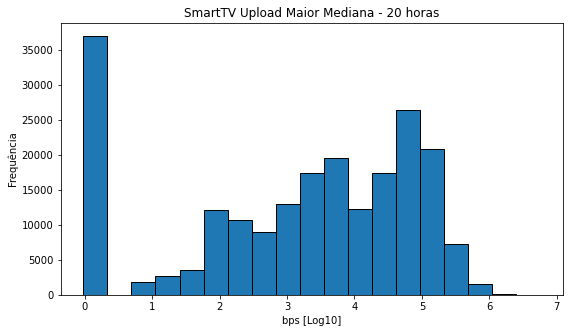

In [25]:
plt.figure(figsize=(9,5))
plt.hist(dataset1.bytes_up_log, bins = sturges(dataset1,'bytes_up_log'), edgecolor="black")
plt.title(f"SmartTV Upload Maior Mediana - {dataset1_hora} horas")
plt.xlabel("bps [Log10]")
plt.ylabel("Frequência")
plt.show()

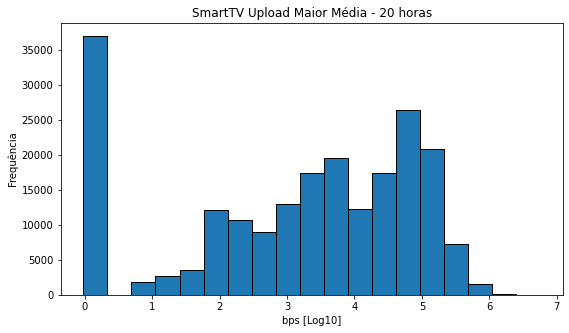

In [26]:
plt.figure(figsize=(9,5))
plt.hist(dataset2.bytes_up_log, bins = sturges(dataset2,'bytes_up_log'), edgecolor="black")
plt.title(f"SmartTV Upload Maior Média - {dataset2_hora} horas")
plt.xlabel("bps [Log10]")
plt.ylabel("Frequência")
plt.show()

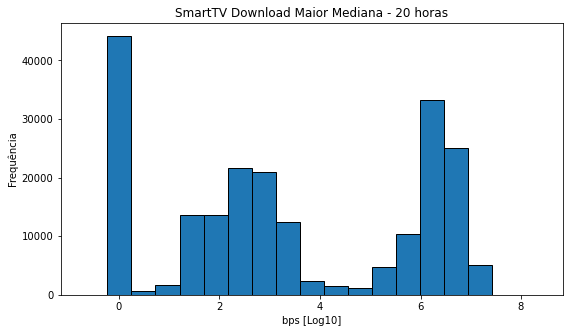

In [27]:
plt.figure(figsize=(9,5))
plt.hist(dataset3.bytes_down_log, bins = sturges(dataset3,'bytes_down_log'), edgecolor="black")
plt.title(f"SmartTV Download Maior Mediana - {dataset3_hora} horas")
plt.xlabel("bps [Log10]")
plt.ylabel("Frequência")
plt.show()

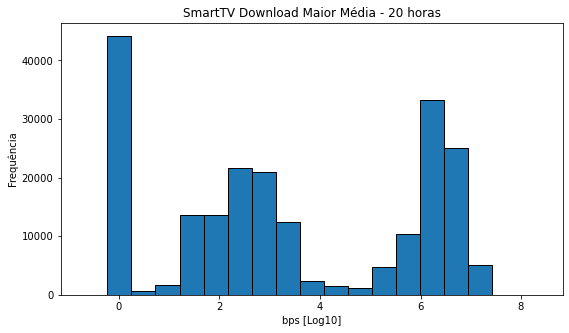

In [28]:
plt.figure(figsize=(9,5))
plt.hist(dataset4.bytes_down_log, bins = sturges(dataset4,'bytes_down_log'), edgecolor="black")
plt.title(f"SmartTV Download Maior Média - {dataset4_hora} horas")
plt.xlabel("bps [Log10]")
plt.ylabel("Frequência")
plt.show()

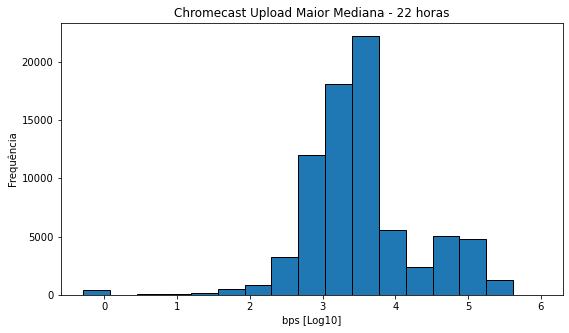

In [29]:
plt.figure(figsize=(9,5))
plt.hist(dataset5.bytes_up_log, bins = sturges(dataset5,'bytes_up_log'), edgecolor="black")
plt.title(f"Chromecast Upload Maior Mediana - {dataset5_hora} horas")
plt.xlabel("bps [Log10]")
plt.ylabel("Frequência")
plt.show()

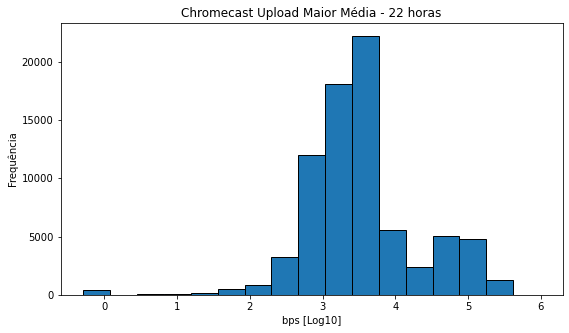

In [30]:
plt.figure(figsize=(9,5))
plt.hist(dataset6.bytes_up_log, bins = sturges(dataset6,'bytes_up_log'), edgecolor="black")
plt.title(f"Chromecast Upload Maior Média - {dataset6_hora} horas")
plt.xlabel("bps [Log10]")
plt.ylabel("Frequência")
plt.show()

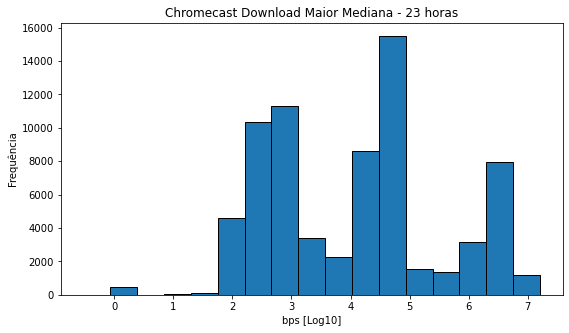

In [31]:
plt.figure(figsize=(9,5))
plt.hist(dataset7.bytes_down_log, bins = sturges(dataset7,'bytes_down_log'), edgecolor="black")
plt.title(f"Chromecast Download Maior Mediana - {dataset7_hora} horas")
plt.xlabel("bps [Log10]")
plt.ylabel("Frequência")
plt.show()

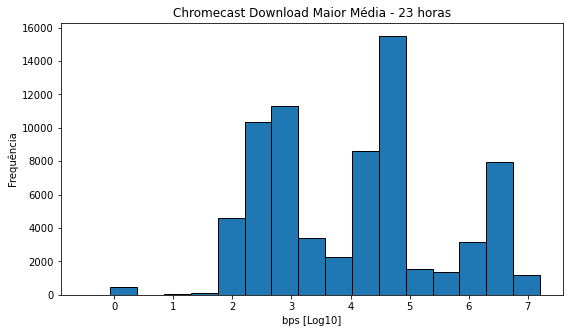

In [32]:
plt.figure(figsize=(9,5))
plt.hist(dataset8.bytes_down_log, bins = sturges(dataset8,'bytes_down_log'), edgecolor="black")
plt.title(f"Chromecast Download Maior Média - {dataset8_hora} horas")
plt.xlabel("bps [Log10]")
plt.ylabel("Frequência")
plt.show()

In [33]:
dataset8

,device_id,date_hour,bytes_up,bytes_down,bytes_up_log,bytes_down_log,hora
1312,66161985.0,2021-09-06 23:00:00,940.065574,3.443934e+02,2.973158,2.537055,23.0
1313,66161985.0,2021-09-06 23:01:00,2163.934426,3.769141e+04,3.335244,4.576242,23.0
1314,66161985.0,2021-09-06 23:02:00,1071.868852,2.986230e+02,3.030142,2.475123,23.0
1315,66161985.0,2021-09-06 23:03:00,5953.419355,3.155665e+04,3.774766,4.499091,23.0
1316,66161985.0,2021-09-06 23:04:00,919.081967,2.140328e+02,2.963354,2.330480,23.0
...,...,...,...,...,...,...,...
1620094,90339988.0,2021-11-25 23:55:00,87728.000000,2.222656e+06,4.943138,6.346872,23.0
1620095,90339988.0,2021-11-25 23:56:00,104736.000000,2.518912e+06,5.020096,6.401213,23.0
1620096,90339988.0,2021-11-25 23:57:00,158976.000000,4.981840e+06,5.201332,6.697390,23.0
1620097,90339988.0,2021-11-25 23:58:00,189448.000000,5.238808e+06,5.277490,6.719232,23.0


### MLE

#### Gaussiana

In [34]:
dataset1_media = dataset1['bytes_up_log'].mean()
dataset1_desvpad = dataset1['bytes_up_log'].std()
print(f'MLE dataset1 - Média:{dataset1_media} / Desvio Padrão:{dataset1_desvpad}')

dataset2_media = dataset2['bytes_up_log'].mean()
dataset2_desvpad = dataset2['bytes_up_log'].std()
print(f'MLE dataset2 - Média:{dataset2_media} / Desvio Padrão:{dataset2_desvpad}')

dataset3_media = dataset3['bytes_down_log'].mean()
dataset3_desvpad = dataset3['bytes_down_log'].std()
print(f'MLE dataset3 - Média:{dataset3_media} / Desvio Padrão:{dataset3_desvpad}')

dataset4_media = dataset4['bytes_down_log'].mean()
dataset4_desvpad = dataset4['bytes_down_log'].std()
print(f'MLE dataset4 - Média:{dataset4_media} / Desvio Padrão:{dataset4_desvpad}')

dataset5_media = dataset5['bytes_up_log'].mean()
dataset5_desvpad = dataset5['bytes_up_log'].std()
print(f'MLE dataset5 - Média:{dataset5_media} / Desvio Padrão:{dataset5_desvpad}')

dataset6_media = dataset6['bytes_up_log'].mean()
dataset6_desvpad = dataset6['bytes_up_log'].std()
print(f'MLE dataset6 - Média:{dataset6_media} / Desvio Padrão:{dataset6_desvpad}')

dataset7_media = dataset7['bytes_down_log'].mean()
dataset7_desvpad = dataset7['bytes_down_log'].std()
print(f'MLE dataset7 - Média:{dataset7_media} / Desvio Padrão:{dataset7_desvpad}')

dataset8_media = dataset8['bytes_down_log'].mean()
dataset8_desvpad = dataset8['bytes_down_log'].std()
print(f'MLE dataset8 - Média:{dataset8_media} / Desvio Padrão:{dataset8_desvpad}')

MLE dataset1 - Média:3.122804189471945 / Desvio Padrão:1.7814349737101582
MLE dataset2 - Média:3.122804189471945 / Desvio Padrão:1.7814349737101582
MLE dataset3 - Média:3.3940222933994457 / Desvio Padrão:2.4918544214539335
MLE dataset4 - Média:3.3940222933994457 / Desvio Padrão:2.4918544214539335
MLE dataset5 - Média:3.521018359629359 / Desvio Padrão:0.7728483585608789
MLE dataset6 - Média:3.521018359629359 / Desvio Padrão:0.7728483585608789
MLE dataset7 - Média:4.052065340608467 / Desvio Padrão:1.470244247489963
MLE dataset8 - Média:4.052065340608467 / Desvio Padrão:1.470244247489963


#### Gamma

Obtenção dos parâmetros da seguinte forma:

shape := 4/Skewness(X, I)^2

offset := Mean(X, I) - SDeviation(X, I)*Sqrt(shape)

scale := Variance(X, I)/(Mean(X, I) - offset)


In [35]:
#Obtenção das variáveis shape, offset e scale.
shape_dataset1, offset_dataset1, scale_dataset1 = gamma.fit(dataset1["bytes_up_log"])
print(f'MLE dataset1 - Shape: {shape_dataset1} / Offset: {offset_dataset1} / Scale: {scale_dataset1}')
shape_dataset2, offset_dataset2, scale_dataset2 = gamma.fit(dataset2["bytes_up_log"])
print(f'MLE dataset2 - Shape: {shape_dataset2} / Offset: {offset_dataset2} / Scale: {scale_dataset2}')

shape_dataset3, offset_dataset3, scale_dataset3 = gamma.fit(dataset3["bytes_down_log"])
print(f'MLE dataset3 - Shape: {shape_dataset3} / Offset: {offset_dataset3} / Scale: {scale_dataset3}')
shape_dataset4, offset_dataset4, scale_dataset4 = gamma.fit(dataset4["bytes_down_log"])
print(f'MLE dataset4 - Shape: {shape_dataset4} / Offset: {offset_dataset4} / Scale: {scale_dataset4}')

shape_dataset5, offset_dataset5, scale_dataset5 = gamma.fit(dataset5["bytes_up_log"])
print(f'MLE dataset5 - Shape: {shape_dataset5} / Offset: {offset_dataset5} / Scale: {scale_dataset5}')
shape_dataset6, offset_dataset6, scale_dataset6 = gamma.fit(dataset6["bytes_up_log"])
print(f'MLE dataset6 - Shape: {shape_dataset6} / Offset: {offset_dataset6} / Scale: {scale_dataset6}')

shape_dataset7, offset_dataset7, scale_dataset7 = gamma.fit(dataset7["bytes_down_log"])
print(f'MLE dataset7 - Shape: {shape_dataset7} / Offset: {offset_dataset7} / Scale: {scale_dataset7}')
shape_dataset8, offset_dataset8, scale_dataset8 = gamma.fit(dataset8["bytes_down_log"])
print(f'MLE dataset8 - Shape: {shape_dataset8} / Offset: {offset_dataset8} / Scale: {scale_dataset8}')

MLE dataset1 - Shape: 209.5414387375581 / Offset: -23.34040210230087 / Scale: 0.12626185857832184
MLE dataset2 - Shape: 209.5414387375581 / Offset: -23.34040210230087 / Scale: 0.12626185857832184
MLE dataset3 - Shape: 893.3317361585573 / Offset: -71.07563105104046 / Scale: 0.08336184655720486
MLE dataset4 - Shape: 893.3317361585573 / Offset: -71.07563105104046 / Scale: 0.08336184655720486
MLE dataset5 - Shape: 5159.289608766861 / Offset: -51.99285265554413 / Scale: 0.010759939010812722
MLE dataset6 - Shape: 5159.289608766861 / Offset: -51.99285265554413 / Scale: 0.010759939010812722
MLE dataset7 - Shape: 27.264762975234554 / Offset: -3.6550707752725704 / Scale: 0.2826775424906913
MLE dataset8 - Shape: 27.264762975234554 / Offset: -3.6550707752725704 / Scale: 0.2826775424906913


### Gráficos MLE

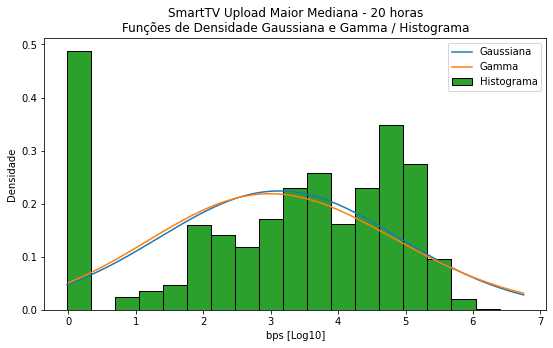

In [36]:
plt.figure(figsize=(9,5))

plt.title(f'SmartTV Upload Maior Mediana - {dataset1_hora} horas\nFunções de Densidade Gaussiana e Gamma / Histograma')

data = dataset1['bytes_up_log']

x = np.linspace(data.min(),data.max(),len(data))
y = norm.pdf(x,dataset1_media,dataset1_desvpad)
plt.plot(x,y)


x = np.linspace(0, data.max(), 100)
y = gamma.pdf(x, shape_dataset1, offset_dataset1, scale_dataset1)
plt.plot(x, y,label='Gamma')

plt.xlabel('bps [Log10]')
plt.ylabel('Densidade')

plt.hist(data, bins = sturges(dataset1,'bytes_up_log'), edgecolor="black",density=True)

plt.legend(["Gaussiana", "Gamma", "Histograma"])

plt.show()

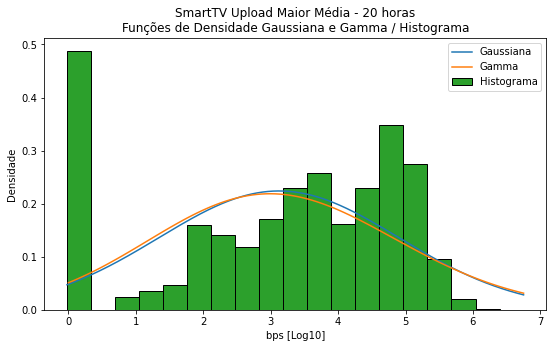

In [37]:
plt.figure(figsize=(9,5))

plt.title(f'SmartTV Upload Maior Média - {dataset2_hora} horas\nFunções de Densidade Gaussiana e Gamma / Histograma')

data = dataset2['bytes_up_log']

x = np.linspace(data.min(),data.max(),len(data))
y = norm.pdf(x,dataset2_media,dataset2_desvpad)
plt.plot(x,y)


x = np.linspace(0, data.max(), 100)
y = gamma.pdf(x, shape_dataset2, offset_dataset2, scale_dataset2)
plt.plot(x, y)

plt.xlabel('bps [Log10]')
plt.ylabel('Densidade')

plt.hist(data, bins = sturges(dataset2,'bytes_up_log'), edgecolor="black",density=True)

plt.legend(["Gaussiana", "Gamma", "Histograma"])

plt.show()

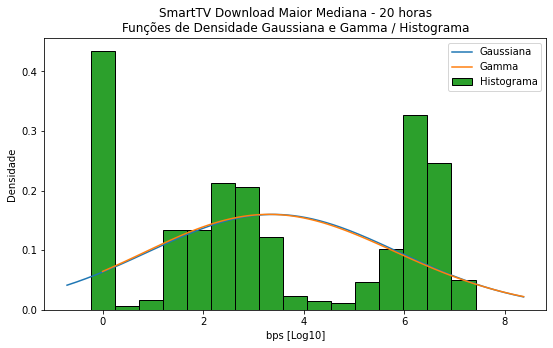

In [38]:
plt.figure(figsize=(9,5))

plt.title(f'SmartTV Download Maior Mediana - {dataset3_hora} horas\nFunções de Densidade Gaussiana e Gamma / Histograma')

data = dataset3['bytes_down_log']

x = np.linspace(data.min(),data.max(),len(data))
y = norm.pdf(x,dataset3_media,dataset3_desvpad)
plt.plot(x,y)


x = np.linspace(0, data.max(), 100)
y = gamma.pdf(x, shape_dataset3, offset_dataset3, scale_dataset3)
plt.plot(x, y)

plt.xlabel('bps [Log10]')
plt.ylabel('Densidade')

plt.hist(data, bins = sturges(dataset3,'bytes_down_log'), edgecolor="black",density=True)

plt.legend(["Gaussiana", "Gamma", "Histograma"])

plt.show()

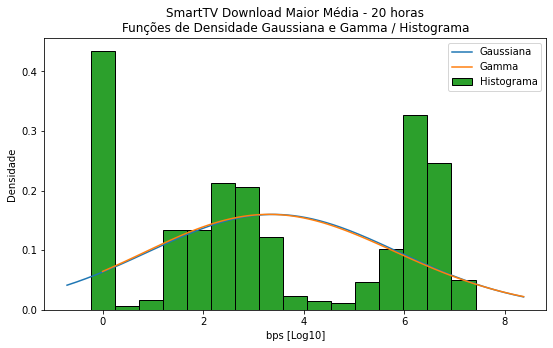

In [39]:
plt.figure(figsize=(9,5))

plt.title(f'SmartTV Download Maior Média - {dataset4_hora} horas\nFunções de Densidade Gaussiana e Gamma / Histograma')

data = dataset4['bytes_down_log']

x = np.linspace(data.min(),data.max(),len(data))
y = norm.pdf(x,dataset4_media,dataset4_desvpad)
plt.plot(x,y)


x = np.linspace(0, data.max(), 100)
y = gamma.pdf(x, shape_dataset4, offset_dataset4, scale_dataset4)
plt.plot(x, y)

plt.xlabel('bps [Log10]')
plt.ylabel('Densidade')

plt.hist(data, bins = sturges(dataset4,'bytes_down_log'), edgecolor="black",density=True)

plt.legend(["Gaussiana", "Gamma", "Histograma"])

plt.show()

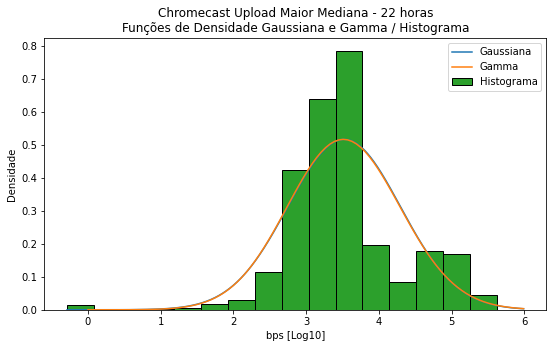

In [40]:
plt.figure(figsize=(9,5))

plt.title(f'Chromecast Upload Maior Mediana - {dataset5_hora} horas\nFunções de Densidade Gaussiana e Gamma / Histograma')

data = dataset5['bytes_up_log']

x = np.linspace(data.min(),data.max(),len(data))
y = norm.pdf(x,dataset5_media,dataset5_desvpad)
plt.plot(x,y)


x = np.linspace(0, data.max(), 100)
y = gamma.pdf(x, shape_dataset5, offset_dataset5, scale_dataset5)
plt.plot(x, y)

plt.xlabel('bps [Log10]')
plt.ylabel('Densidade')

plt.hist(data, bins = sturges(dataset5,'bytes_up_log'), edgecolor="black",density=True)

plt.legend(["Gaussiana", "Gamma", "Histograma"])

plt.show()

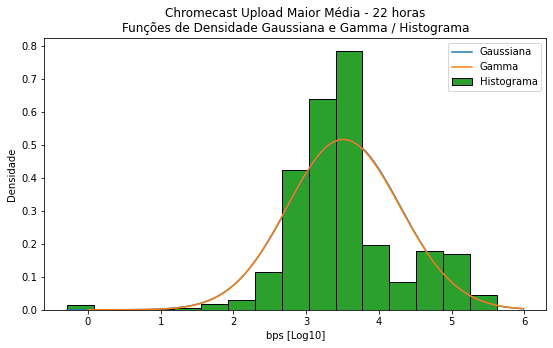

In [41]:
plt.figure(figsize=(9,5))

plt.title(f'Chromecast Upload Maior Média - {dataset6_hora} horas\nFunções de Densidade Gaussiana e Gamma / Histograma')

data = dataset6['bytes_up_log']

x = np.linspace(data.min(),data.max(),len(data))
y = norm.pdf(x,dataset6_media,dataset6_desvpad)
plt.plot(x,y)


x = np.linspace(0, data.max(), 100)
y = gamma.pdf(x, shape_dataset6, offset_dataset6, scale_dataset6)
plt.plot(x, y)

plt.xlabel('bps [Log10]')
plt.ylabel('Densidade')

plt.hist(data, bins = sturges(dataset6,'bytes_up_log'), edgecolor="black",density=True)

plt.legend(["Gaussiana", "Gamma", "Histograma"])

plt.show()

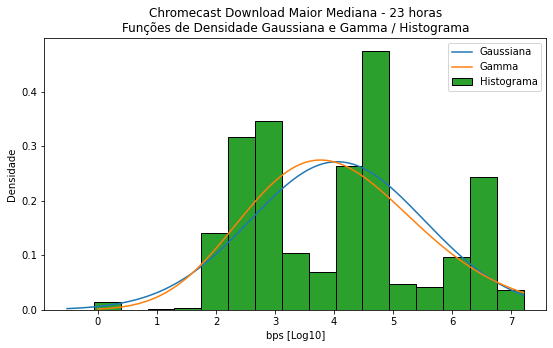

In [42]:
plt.figure(figsize=(9,5))

plt.title(f'Chromecast Download Maior Mediana - {dataset7_hora} horas\nFunções de Densidade Gaussiana e Gamma / Histograma')

data = dataset7['bytes_down_log']

x = np.linspace(data.min(),data.max(),len(data))
y = norm.pdf(x,dataset7_media,dataset7_desvpad)
plt.plot(x,y)


x = np.linspace(0, data.max(), 100)
y = gamma.pdf(x, shape_dataset7, offset_dataset7, scale_dataset7)
plt.plot(x, y)

plt.xlabel('bps [Log10]')
plt.ylabel('Densidade')

plt.hist(data, bins = sturges(dataset7,'bytes_down_log'), edgecolor="black",density=True)

plt.legend(["Gaussiana", "Gamma", "Histograma"])

plt.show()

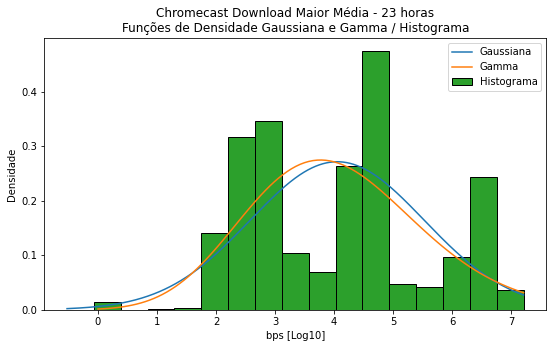

In [43]:
plt.figure(figsize=(9,5))

plt.title(f'Chromecast Download Maior Média - {dataset8_hora} horas\nFunções de Densidade Gaussiana e Gamma / Histograma')

data = dataset8['bytes_down_log']

x = np.linspace(data.min(),data.max(),len(data))
y = norm.pdf(x,dataset8_media,dataset8_desvpad)
plt.plot(x,y)


x = np.linspace(0, data.max(), 100)
y = gamma.pdf(x, shape_dataset8, offset_dataset8, scale_dataset8)
plt.plot(x, y)

plt.xlabel('bps [Log10]')
plt.ylabel('Densidade')

plt.hist(data, bins = sturges(dataset8,'bytes_down_log'), edgecolor="black",density=True)

plt.legend(["Gaussiana", "Gamma", "Histograma"])

plt.show()

### Gráfico de Probabilidade

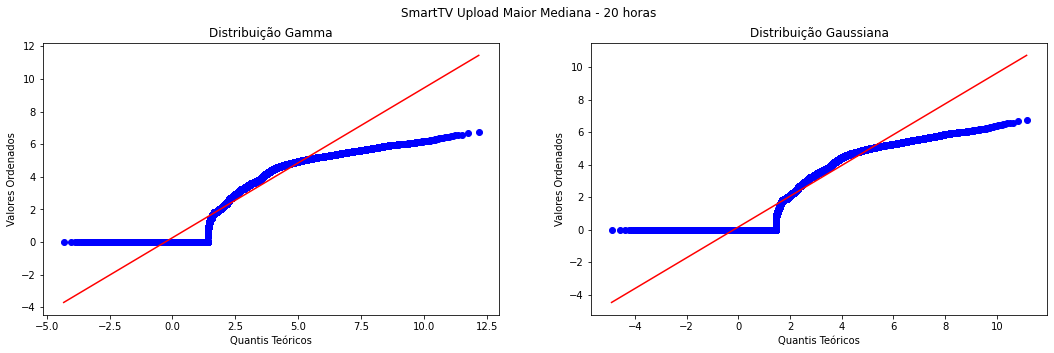

In [44]:
fig, axes = plt.subplots(1,2,figsize=(18,5))

fig.suptitle(f'SmartTV Upload Maior Mediana - {dataset1_hora} horas')

x = dataset1.bytes_up_log
probplot(x, dist=gamma, sparams=(shape_dataset1,offset_dataset1,scale_dataset1), plot=axes[0])
probplot(x, dist=norm, sparams=(dataset1_media,dataset1_desvpad), plot=axes[1])

axes[0].set_title('Distribuição Gamma')
axes[1].set_title('Distribuição Gaussiana')

axes[0].set(xlabel = 'Quantis Teóricos', ylabel = 'Valores Ordenados')
axes[1].set(xlabel = 'Quantis Teóricos', ylabel = 'Valores Ordenados')

plt.show()

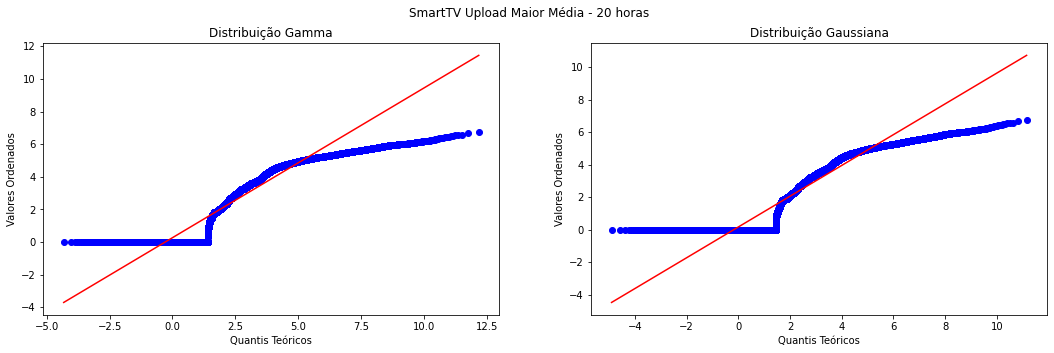

In [45]:
fig, axes = plt.subplots(1,2,figsize=(18,5))

fig.suptitle(f'SmartTV Upload Maior Média - {dataset2_hora} horas')

x = dataset2.bytes_up_log
probplot(x, dist=gamma, sparams=(shape_dataset2,offset_dataset2,scale_dataset2), plot=axes[0])
probplot(x, dist=norm, sparams=(dataset2_media,dataset2_desvpad), plot=axes[1])

axes[0].set_title('Distribuição Gamma')
axes[1].set_title('Distribuição Gaussiana')

axes[0].set(xlabel = 'Quantis Teóricos', ylabel = 'Valores Ordenados')
axes[1].set(xlabel = 'Quantis Teóricos', ylabel = 'Valores Ordenados')

plt.show()

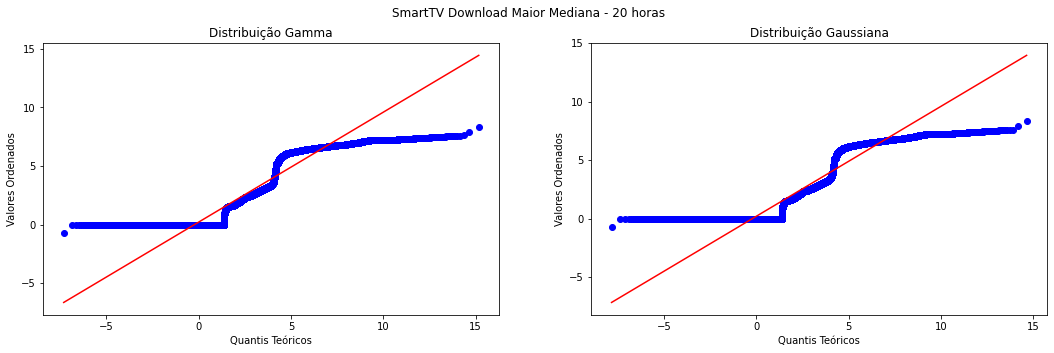

In [46]:
fig, axes = plt.subplots(1,2,figsize=(18,5))

fig.suptitle(f'SmartTV Download Maior Mediana - {dataset3_hora} horas')

x = dataset3.bytes_down_log
probplot(x, dist=gamma, sparams=(shape_dataset3,offset_dataset3,scale_dataset3), plot=axes[0])
probplot(x, dist=norm, sparams=(dataset3_media,dataset3_desvpad), plot=axes[1])

axes[0].set_title('Distribuição Gamma')
axes[1].set_title('Distribuição Gaussiana')

axes[0].set(xlabel = 'Quantis Teóricos', ylabel = 'Valores Ordenados')
axes[1].set(xlabel = 'Quantis Teóricos', ylabel = 'Valores Ordenados')

plt.show()

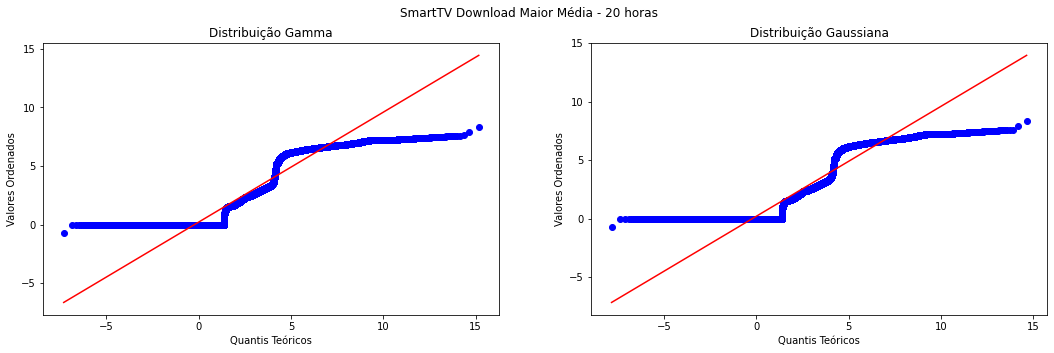

In [47]:
fig, axes = plt.subplots(1,2,figsize=(18,5))

fig.suptitle(f'SmartTV Download Maior Média - {dataset4_hora} horas')

x = dataset4.bytes_down_log
probplot(x, dist=gamma, sparams=(shape_dataset4,offset_dataset4,scale_dataset4), plot=axes[0])
probplot(x, dist=norm, sparams=(dataset4_media,dataset4_desvpad), plot=axes[1])

axes[0].set_title('Distribuição Gamma')
axes[1].set_title('Distribuição Gaussiana')

axes[0].set(xlabel = 'Quantis Teóricos', ylabel = 'Valores Ordenados')
axes[1].set(xlabel = 'Quantis Teóricos', ylabel = 'Valores Ordenados')

plt.show()

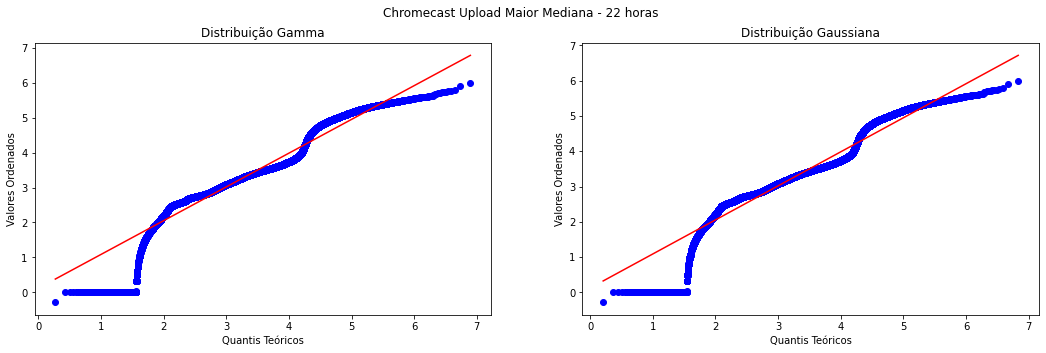

In [48]:
fig, axes = plt.subplots(1,2,figsize=(18,5))

fig.suptitle(f'Chromecast Upload Maior Mediana - {dataset5_hora} horas')

x = dataset5.bytes_up_log
probplot(x, dist=gamma, sparams=(shape_dataset5,offset_dataset5,scale_dataset5), plot=axes[0])
probplot(x, dist=norm, sparams=(dataset5_media,dataset5_desvpad), plot=axes[1])

axes[0].set_title('Distribuição Gamma')
axes[1].set_title('Distribuição Gaussiana')

axes[0].set(xlabel = 'Quantis Teóricos', ylabel = 'Valores Ordenados')
axes[1].set(xlabel = 'Quantis Teóricos', ylabel = 'Valores Ordenados')

plt.show()

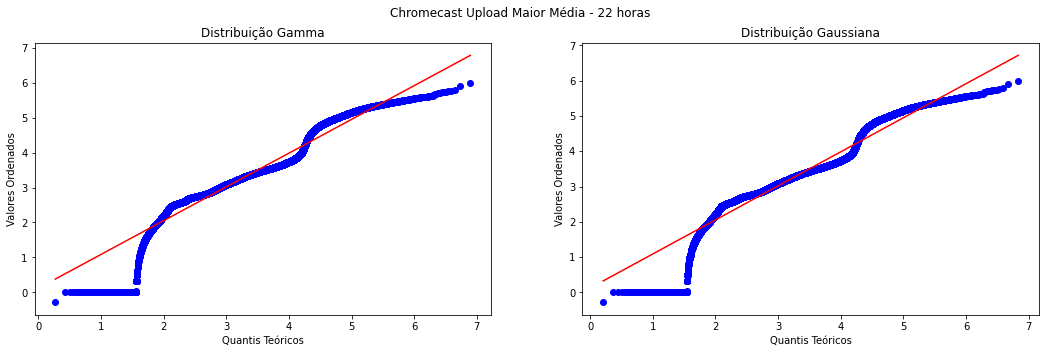

In [49]:
fig, axes = plt.subplots(1,2,figsize=(18,5))

fig.suptitle(f'Chromecast Upload Maior Média - {dataset6_hora} horas')

x = dataset6.bytes_up_log
probplot(x, dist=gamma, sparams=(shape_dataset6,offset_dataset6,scale_dataset6), plot=axes[0])
probplot(x, dist=norm, sparams=(dataset6_media,dataset6_desvpad), plot=axes[1])

axes[0].set_title('Distribuição Gamma')
axes[1].set_title('Distribuição Gaussiana')

axes[0].set(xlabel = 'Quantis Teóricos', ylabel = 'Valores Ordenados')
axes[1].set(xlabel = 'Quantis Teóricos', ylabel = 'Valores Ordenados')

plt.show()

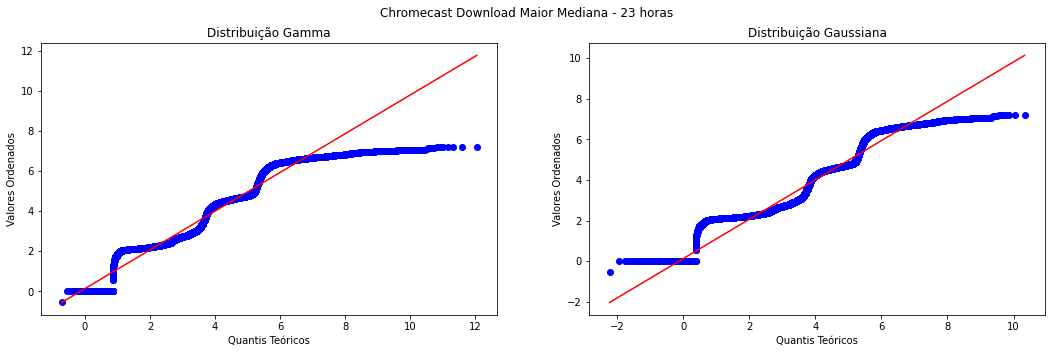

In [50]:
fig, axes = plt.subplots(1,2,figsize=(18,5))

fig.suptitle(f'Chromecast Download Maior Mediana - {dataset7_hora} horas')

x = dataset7.bytes_down_log
probplot(x, dist=gamma, sparams=(shape_dataset7,offset_dataset7,scale_dataset7), plot=axes[0])
probplot(x, dist=norm, sparams=(dataset7_media,dataset7_desvpad), plot=axes[1])

axes[0].set_title('Distribuição Gamma')
axes[1].set_title('Distribuição Gaussiana')

axes[0].set(xlabel = 'Quantis Teóricos', ylabel = 'Valores Ordenados')
axes[1].set(xlabel = 'Quantis Teóricos', ylabel = 'Valores Ordenados')

plt.show()

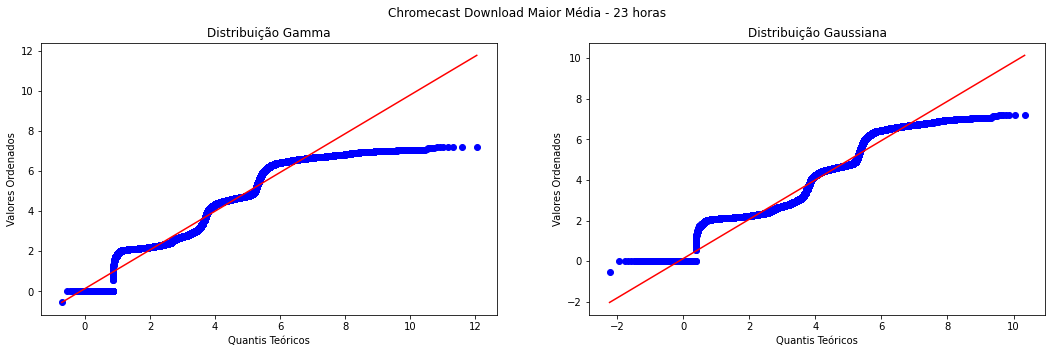

In [51]:
fig, axes = plt.subplots(1,2,figsize=(18,5))

fig.suptitle(f'Chromecast Download Maior Média - {dataset8_hora} horas')

x = dataset8.bytes_down_log
probplot(x, dist=gamma, sparams=(shape_dataset8,offset_dataset8,scale_dataset8), plot=axes[0])
probplot(x, dist=norm, sparams=(dataset8_media,dataset8_desvpad), plot=axes[1])

axes[0].set_title('Distribuição Gamma')
axes[1].set_title('Distribuição Gaussiana')

axes[0].set(xlabel = 'Quantis Teóricos', ylabel = 'Valores Ordenados')
axes[1].set(xlabel = 'Quantis Teóricos', ylabel = 'Valores Ordenados')

plt.show()

## Análise da correlação entre as taxas de upload e download para os horários com o maior valor de tráfego

Correlação amostral entre o dataset1 e o dataset3: 0.9154767447399036


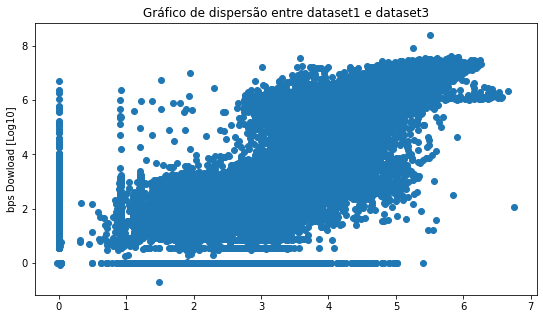

In [52]:
correlacao = pearsonr(dataset1["bytes_up_log"], dataset3["bytes_down_log"])
print(f'Correlação amostral entre o dataset1 e o dataset3: {correlacao[0]}')

plt.figure(figsize=(9,5))
plt.scatter(dataset1["bytes_up_log"], dataset3["bytes_down_log"])
plt.xlabel('bps Upload [Log10]')
plt.ylabel('bps Dowload [Log10]')
plt.title("Gráfico de dispersão entre dataset1 e dataset3")
plt.show()

Correlação amostral entre o dataset2 e o dataset4: 0.9154767447399036


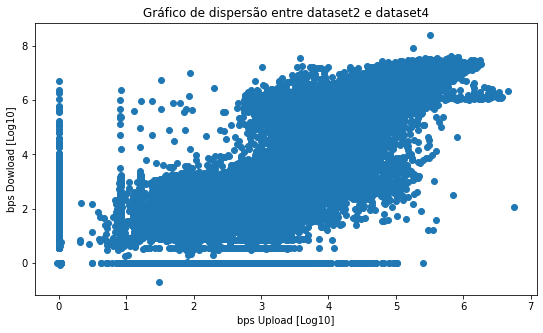

In [53]:
correlacao = pearsonr(dataset2["bytes_up_log"], dataset4["bytes_down_log"])
print(f'Correlação amostral entre o dataset2 e o dataset4: {correlacao[0]}')

plt.figure(figsize=(9,5))
plt.scatter(dataset2["bytes_up_log"], dataset4["bytes_down_log"])
plt.xlabel("bps Upload [Log10]")
plt.ylabel("bps Dowload [Log10]")
plt.title("Gráfico de dispersão entre dataset2 e dataset4")
plt.show()

Correlação amostral entre o dataset5(amostra) e o dataset7: 0.002307878575042075


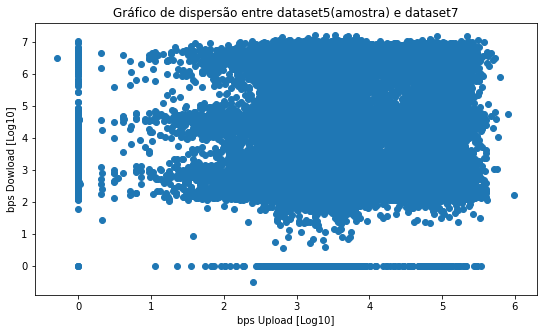

In [54]:
#Pelo fato dos dois dataset não terem o mesmo tamanho, se faz necessário pegar uma amostra.

dataset5_sample = dataset5.sample(n=dataset7.shape[0])
correlacao = pearsonr(dataset5_sample["bytes_up_log"], dataset7["bytes_down_log"])
print(f'Correlação amostral entre o dataset5(amostra) e o dataset7: {correlacao[0]}')

plt.figure(figsize=(9,5))
plt.scatter(dataset5_sample["bytes_up_log"], dataset7["bytes_down_log"])
plt.xlabel("bps Upload [Log10]")
plt.ylabel("bps Dowload [Log10]")
plt.title("Gráfico de dispersão entre dataset5(amostra) e dataset7")
plt.show()

Correlação amostral entre o dataset6(amostra) e o dataset8: 0.004141674308053867


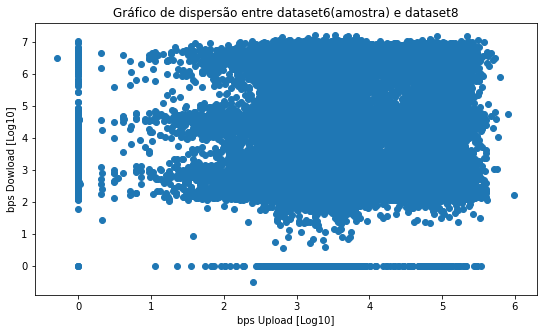

In [55]:
dataset6_sample = dataset6.sample(n=dataset8.shape[0])
correlacao = pearsonr(dataset6_sample["bytes_up_log"], dataset8["bytes_down_log"])
print(f'Correlação amostral entre o dataset6(amostra) e o dataset8: {correlacao[0]}')

plt.figure(figsize=(9,5))
plt.scatter(dataset5_sample["bytes_up_log"], dataset7["bytes_down_log"])
plt.xlabel("bps Upload [Log10]")
plt.ylabel("bps Dowload [Log10]")
plt.title("Gráfico de dispersão entre dataset6(amostra) e dataset8")
plt.show()

## Comparação dos dados gerados pelos dispositivos Smart-TV e Chromecast

In [ ]:
#g, p = power_divergence(observed_upload_df1, observed_upload_df2, lambda_='log-likelihood')